# Exercises for Frequentist Inference 

## Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

%matplotlib inline

In [2]:
# For reproducibility, fix seed.
np.random.seed(42)

## 6. Foundations and Maximum Likelihood

### 1. Fisher scoring algorithm for the maximum likelihood estimation

**Analytical Results**

The linear regression has the form of 
$y = b^{T}x + \epsilon$ where the first element of the vector x is additionally added with a value of 1 to account for the intercept. The error is assumed to be distributed with \~N(0, $\sigma$). The regression can thus be rewritten as \~N(XW, $\sigma$). Expressed as a conditional probability density model, it becomes:

\begin{aligned}
p(y∣x,\theta)=(y∣μ(x),\sigma^{2}(x)).
\end{aligned}

Thus, taking the negative log-likelihood results in
\begin{aligned}
NL(\theta) &= -\sum_{i=1}^{n}log p(y_{i} | x_{i}, \theta) \\
\end{aligned}
Thus, $\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

(See also https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d and https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression for the derivation).

**Data Generation**

In [3]:
def generate_linear_relation(up_to, n, a, b):
    """
    Generates x, y with a linear relation y = a*x + b + Gaussian noise.
    
    Args:
        up_to: generates samples from 0 to up_to
        n: number of sampled datapoints
        a: slope
        b: intercept
        
    Returns:
        x, y
    """
    data = np.zeros(shape = (up_to, 2))
    for i, sample in enumerate(data):
        y = a * i + b + np.random.normal(0, 10)
        data[i, 0] = i
        data[i, 1] = y
    
    idx = np.random.choice(data.shape[0], n, replace = False)
    data = data[idx]
    
    return data[:, 0], data[:, 1]

In [4]:
# Parameters for generation y = a*x + b
np.random.seed(23)
upper = 100
n = 100
a = 1
b = 10
x, y = generate_linear_relation(upper, n, a, b)
X = np.vstack((x,y)).T

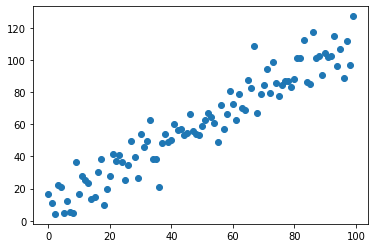

In [5]:
plt.scatter(x, y)

In [6]:
# Ground truth.
beta = np.linalg.inv(X.T@X)@X.T@y
beta.shape

(2,)

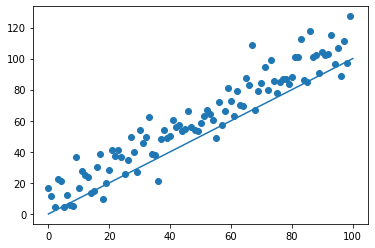

In [7]:
all_ = np.linspace(0, 100, 101)
plt.scatter(x, y)
plt.plot(all_, beta[1] * all_)

### Q: the intercept is not correctly calculated?

**Fisher Scoring Algorithm**

As this exercise is too hard (as discussed in the tutorial), I will abort it at this point (and delete the fruitless approaches I did here). 

### 2. Numerical Maximum Likelihood for Bernoulli Random Variables

The derivative for the log likelihood for the Bernoulli with $~B(\mu)$ is:

$ \frac{\delta} {\delta \mu} ln(x) = \frac{1}{\mu}\sum_{i}^{n}x_{i}-\frac{1}{1-\mu}(n-\sum_{i}^{n}x_{i})$

and the second derivative is:

$ \frac{\delta} {\delta \mu} ln(x) = -\frac{1}{\mu^{2}}\sum_{i}^{n}x_{i}-\frac{1}{(1-\mu)^{2}}(n-\sum_{i}^{n}x_{i})$.

For optimization, we will use the Newton-Raphson method.


In [243]:
def newton_raphson(data, n, theta):
    all_thetas = []
    all_thetas.append(theta) # Track initial condition.
    
    eps = 0.00000001
    f_1 = lambda x : (1/x) * np.sum(data) - 1/(1-x) * (n - np.sum(data))
    f_2 = lambda x : -1/(x**2) * np.sum(data) - 1/((1-x)**2) * (n - np.sum(data))
    
#     while (f_1(theta) != 0):
    while (not np.allclose(theta, 0, 0.1)):
        a = - f_1(theta)/f_2(theta)
#         print(f_1(theta))
#         print(f_2(theta))
#         print(f"Theta {theta}, new val {a}")
        
        theta = theta - f_1(theta)/f_2(theta)
        all_thetas.append(theta)
        
#         print(f"Then: Theta {theta}, new val {a}")
#         break

    return all_thetas

In [244]:
n = 20
all_mu = [0.7, 1.0]

In [ ]:
sample = np.random.binomial(1, mu, n)
initial_theta = 0.1 # np.random.random() # Random initialization
est_mu = newton_raphson(sample, n, initial_theta)


Optimal parameter according to max. log likelihood: 65


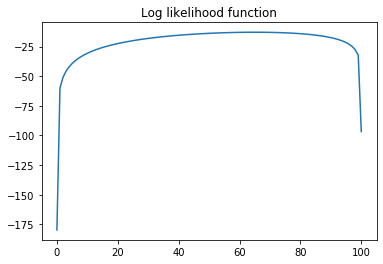

In [181]:
# Likelihood estimation
eps = 0.000001 #For not diving by 0.
f = lambda x : np.log(x + eps) * np.sum(sample) + np.log(1-x + eps) * (n - np.sum(sample))
sample = np.random.binomial(1, mu, n)
thetas = np.linspace(0, 1, 101)
plt.plot(f(thetas))
plt.title("Log likelihood function");
theta_star = np.argmax(f(thetas))
print(f"Optimal parameter according to max. log likelihood: {theta_star}")

In [182]:
for mu in all_mu:
    sample = np.random.binomial(1, mu, n)
    initial_theta = 0.1 # np.random.random() # Random initialization
    est_mu = newton_raphson(sample, n, initial_theta)
    
    # Show convergence.
    plt.plot(est_mu, label = 'Estimate')
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.title('Convergence towards $\mu_{MLE}$ of Bernoulli distribution')
    plt.axhline(mu, linestyle = 'dashed', label = 'True Parameter')
    plt.legend()
    plt.show();

KeyboardInterrupt: 

In [76]:
theta = 0.1 # Random initialization. # TODO.
est_mu = newton_raphson(sample, n, theta)

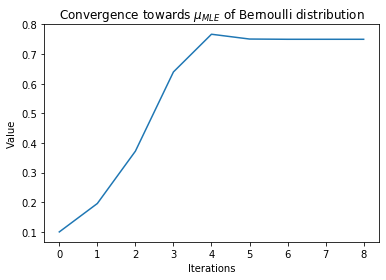

In [83]:
# Show convergence.
plt.plot(est_mu)
plt.xlabel('Iterations')
plt.ylabel('Value')
plt.title('Convergence towards $\mu_{MLE}$ of Bernoulli distribution');

In [45]:
theta = 0.1 

if diff1_loglikelihood(theta) == 0:
    print('asdf')

In [10]:
theta = 0 # Random initialization. # TODO
k = 0
p = 0.0 # TODO: take theta

# diff1 = lambda x : (p-1)*(1-p)**(-x) * p**x * (np.log(1-p) - log(p))
# diff2 = lambda x : (1-p)**(1-x) * p**x * (log(1-p) - log(p))**2

In [11]:
def newton_rhapson():
    pass

In [12]:
# a = rand_bernoulli
# log_likelihood = lambda x : np.log(x)*np.sum(a) + np.log(1-x)*(N-np.sum(a))
# diff1_loglikelihood = lambda x : (1/2)*np.sum(a) - 1/(1-x)*(N-np.sum(a))
# diff2_loglikelihood = lambda x : -1/(x**2)*np.sum(a) - 1/((1-x)**2)*(N-np.sum(bern))

In [13]:
# mle = np.zeros(N+1)
### --> make graph x parameter, y log-likelihood, maximum should be 0.7

### TODO: also works without the likelihood function

### 3. 

In [14]:
## TODO: it should look like a normal distribution histogram

## 7. Finite-sample estimator

### 1. (Un-)biasedness for Normal Distribution

In [26]:
n = 100
mean_ = 0
std_dev = 10
var = std_dev ** 2
sample = np.random.normal(mean_, std_dev, n)

In [27]:
all_means = np.zeros(n)
all_var = np.zeros(n)
all_std_dev = np.zeros(n)

for i in range(2, n):
    all_means[i] = np.mean(sample[:i])
    all_var[i] = np.var(sample[:i], ddof=1)
    all_std_dev[i] = np.std(sample[:i], ddof=1)

In [ ]:
plt.plot(all_means, label = 'Empirical Mean')
plt.plot(all_var, label = 'Empirical Variance')
plt.plot(all_std_dev, label = 'Empirical Std Dev')
plt.xlabel("Number of Samples")
plt.ylabel("Values")
plt.axhline(mean_, color='blue', linestyle='dashed', linewidth=1, label = 'Theoretical Mean')
plt.axhline(std_dev, color = 'green', linestyle='dashed', linewidth=1, label = 'Theoretical Standard Deviation')
plt.axhline(var, color = 'red', linestyle='dashed', linewidth=1, label = 'Theoretical Variance')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"Convergence of Estimators");

In [ ]:
from_ = 1
plt.plot(all_means[from_:] - mean_, label = 'Empirical Mean')
plt.plot(all_var[from_:] - var, label = 'Empirical Variance')
plt.plot(all_std_dev[from_:] - std_dev, label = 'Empirical Std Dev')
plt.xlabel("Number of Samples")
plt.ylabel("Bias")
plt.axhline(0, color='blue', linestyle='dashed', linewidth=1, label = 'No bias')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"(Un-)biasedness of Estimators");

In [ ]:
print(f"Mean true: {mean_}, empirical: {all_means[-1]}\nVar true {var}, empirical {all_var[-1]}\n" \
      f"Std Dev true {std_dev}, empirical {all_std_dev[-1]}")

The bias is not clearly visible in the data, so maybe taking a larger sample size might reduce the noise and show the bias more clearly:

In [ ]:
n = 10000000
mean_ = 0
std_dev = 10
var = std_dev ** 2
sample = np.random.normal(mean_, std_dev, n)

In [ ]:
mean_emp = np.mean(sample)
# Provide degrees of freedom to get to 1/n-1
var_emp = np.var(sample, ddof=1)
std_dev_emp = np.std(sample, ddof=1)

In [ ]:
print(f"Mean true: {mean_}, empirical: {mean_emp}\nVar true {var}, empirical {var_emp}\n" \
      f"Std Dev true {std_dev}, empirical {std_dev_emp}")

In [ ]:
print(f"Mean true: {mean_/mean_emp}\nVar {var/var_emp}\n" \
      f"Std Dev {std_dev/std_dev_emp}")

Although we expected the standard deviation to be biased and the variance to not be biased, it was not possible to show this.

In [ ]:
# TODO: TODO: biasednessofthemaximumlikeliho o dvarianceparameterestimator

### 2. (Un-)Biasedness for Binomial Distribution